# Red Wine Quality Prediction

Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

nspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

we will predict the quality of wine on the basis of given features. We use the wine quality dataset available on Internet for free. This dataset has the fundamental features which are responsible for affecting the quality of the wine. By the use of several Machine learning models, we will predict the quality of the wine.

# importing required libraries
Pandas is a useful library in data handling.
Numpy library used for working with arrays.
Seaborn/Matplotlib are used for data visualisation purpose.
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.


In [4]:
import sklearn
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')


# Session 1. For the purpose of prediction
1. Data importing and processing

In [5]:
df = pd.read_csv('winequality.csv') 
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# About the columns:
    

#Lets check the data types of each column present in dataset
df.info()

Information about the data type of clumns of data

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# EDA

Exploratory Data Analysis
EDA is an approach to analysing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.  Now let’s check the number of null values in the dataset columns wise.



In [7]:
df.isnull().sum().sum()

0

This is to check it there any null values present in given dataset. all variables showint  0 means no blank entry in the dataset.

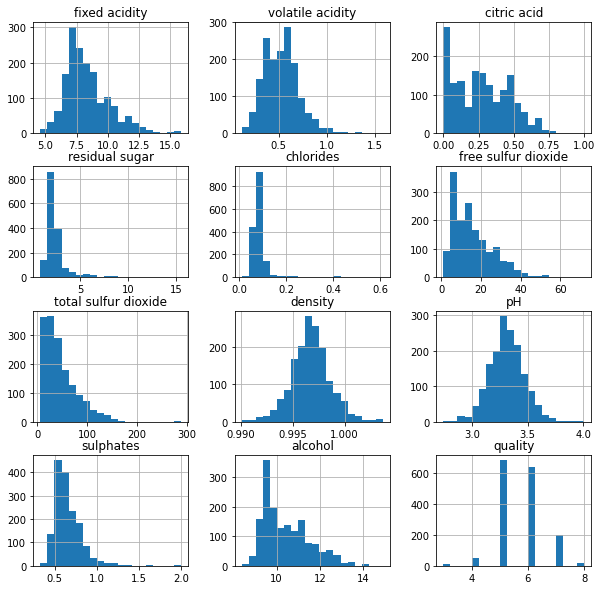

In [8]:
df.hist(bins=20,figsize=(10,10))
plt.show()

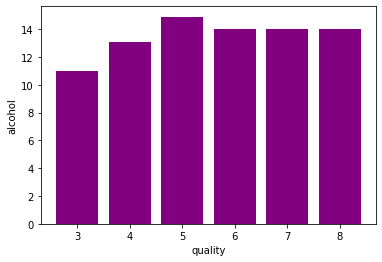

In [32]:
plt.bar(df['quality'],df['alcohol'],color='purple')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [10]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


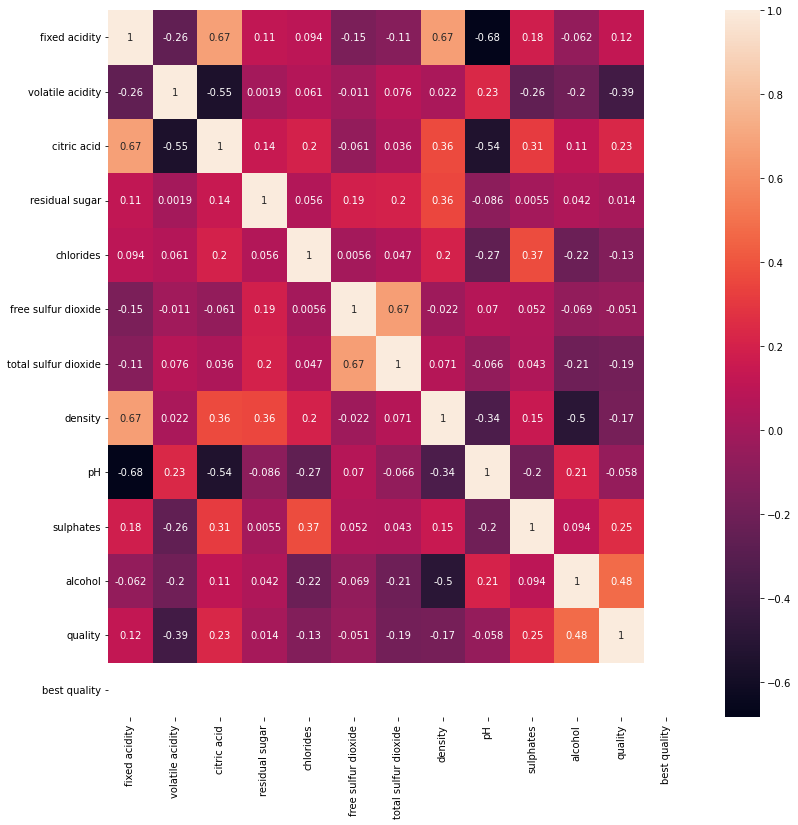

In [34]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True)
plt.show()

we have to find those features that are fully correlated to each other by this we reduce the number of features from the data.

If you think that why we have to discard those correlated, because relationship among them is equal they equally impact on model accuracy so, we delete one of them.

In [37]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

we find those features whose correlation number is high, as you see in the program we set the correlation number greater than 0.7 it means if any feature has a correlation value above 0.7 then it was considered as a fully correlated feature, at last, we find the feature total sulfur dioxide which satisfy the condition.

So, we drop that feature

In [38]:
new_df = df.drop('total sulfur dioxide',axis=1)

In [43]:
new_df.isnull().sum().sum()

0

# Splitting dataset
Now we perform a split operation on our dataset:

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

NameError: name 'x' is not defined

# Applying Model
This is the last step where we apply any suitable model which will give more accuracy, here we will use RandomForestClassifier because it was the only ML model that gives the 88% accuracy which was considered as the best accuracy.


# RandomForestClassifier :

In [ ]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(new_xtrain,y_train)
# predicting score
rnd_score = rnd.score(new_xtest,y_test)
print('score of model is : ',rnd_score)
# display error rate
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_predict)
# calculating root mean squared error
rnd_RMSE = np.sqrt(MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE

Let’s prepare our data for training and splitting it into training and validation data so, that we can select which model’s performance is best as per the use case. We will train some of the state of the art machine learning classification models and then select best out of them using validation data.

In [12]:
df['best quality'] = [1 if x>1 else 0 for x in df.quality]

In [13]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


We have a column with object data type as well let’s replace it with the 0 and 1 as there are only two categories.

In [40]:
features = df.drop(['quality','best quality'],axis = 1)
target = df['best quality']

x_train, x_test, y_train ,y_test = train_test_split(features,target,test_size= 0.2,random_state=40)
xtrain.shape, xtest.shape

((1279, 11), (320, 11))

Normalising the data before training help us to achieve stable and fast training of the model.



In [41]:
y_train.shape,y_test.shape

((1279,), (320,))

In [ ]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)

In [46]:
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(xtrain)
new_xtest = norm_fit.transform(xtest)

As the data has been prepared completely let’s train some state of the art machine learning model on it.

# RandomForestClassifier :¶

In [50]:
# importing modules
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(new_xtrain,y_train)
# predicting score
rnd_score = rnd.score(new_xtest,y_test)
y_predict = rnd.predict(x_test)
print('score of model is : ',rnd_score)
# display error rate
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_predict)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE

score of model is :  1.0
calculating the error
mean squared error is :  0.0


In [51]:
#we are at the end of our article, we can differentiate the predicted values and actual value.

x_predict = list(rnd.predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
1035,1,1
49,1,1
799,1,1
538,1,1
660,1,1
990,1,1
398,1,1
1068,1,1
1155,1,1
468,1,1


# Saving Model
At last, we save our machine learning model:

In [52]:
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(rnd,open(file,'wb'))

So, at this step, our machine learning prediction is over.